In [1]:
from model import *
from linares_plot import * 
from scipy.stats import norm

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


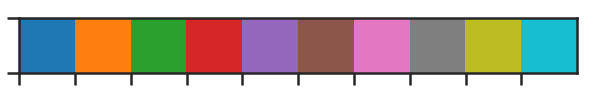

In [11]:
#Palettes
print(sns.color_palette("tab10").as_hex())
sns.palplot(sns.color_palette("tab10"))
plt.show()
c_on = 'darkorange' #'#ff7f0e'
c_off = 'dodgerblue' #'#1f77b4'

onoff_pal=[c_on, c_off]
offon_pal = [c_off, c_on]

In [9]:
pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(250/2) ;
nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

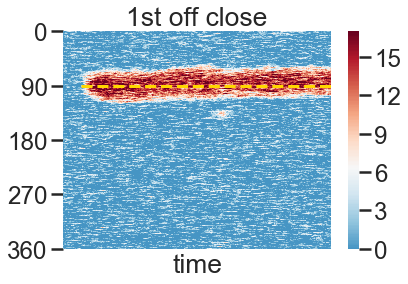

In [67]:
# 1st off close
fee=1
fei=1
fie=1
fii=1

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=49, tauE=20, tauI=10,  n_stims=2, I0E=0.1, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 



RE_sorted=flipud(an[4])
sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.gca().set_title('1st off close')
plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
plt.gca().set_xticks([])
plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
plt.gca().set_yticklabels(['0','90','180', '270', '360'])
plt.gca().set_xlabel('time');

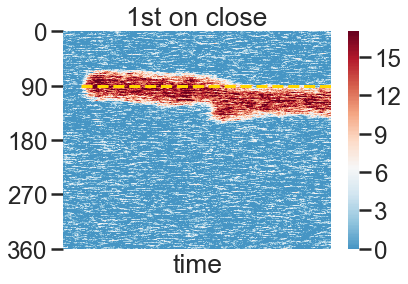

In [63]:
# 1st ON close
fee=1
fei=1
fie=1
fii=1

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=49, tauE=20, tauI=10,  n_stims=2, I0E=0.18, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 

RE_sorted=flipud(an[4])
sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.gca().set_title('1st on close')
plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
plt.gca().set_xticks([])
plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
plt.gca().set_yticklabels(['0','90','180', '270', '360'])
plt.gca().set_xlabel('time');

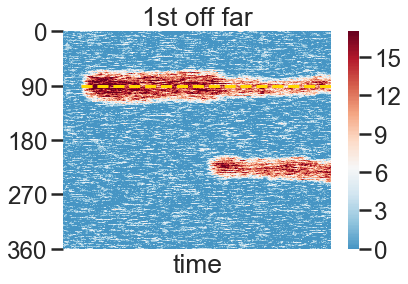

In [36]:
# 1st off far
fee=1
fei=1
fie=1
fii=1

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=135, tauE=20, tauI=10,  n_stims=2, I0E=0.1, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 


RE_sorted=flipud(an[4])
sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.gca().set_title('1st off far')
plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
plt.gca().set_xticks([])
plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
plt.gca().set_yticklabels(['0','90','180', '270', '360'])
plt.gca().set_xlabel('time');

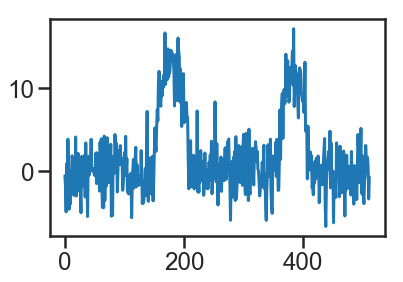

In [37]:
plt.plot(an[3])

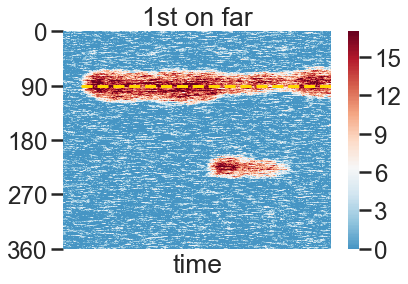

In [76]:
# 1st on far
fee=1
fei=1
fie=1
fii=1

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=135, tauE=20, tauI=10,  n_stims=2, I0E=0.18, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 


RE_sorted=flipud(an[4])
sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.gca().set_title('1st on far')
plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
plt.gca().set_xticks([])
plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
plt.gca().set_yticklabels(['0','90','180', '270', '360'])
plt.gca().set_xlabel('time');

### Remember 2nd

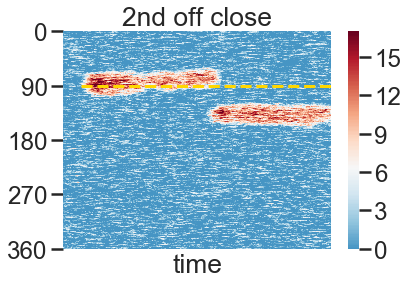

In [73]:
# 2nd off close
fee=0.94
fei=0.92
fie=1.14
fii=1.08

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=49, tauE=20, tauI=10,  n_stims=2, I0E=0.1, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 



RE_sorted=flipud(an[4])
sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.gca().set_title('2nd off close')
plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
plt.gca().set_xticks([])
plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
plt.gca().set_yticklabels(['0','90','180', '270', '360'])
plt.gca().set_xlabel('time');

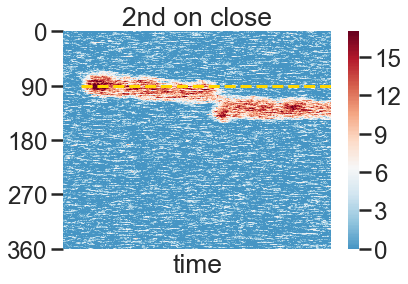

In [74]:
# 2nd ON close
fee=0.94
fei=0.92
fie=1.14
fii=1.08

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=49, tauE=20, tauI=10,  n_stims=2, I0E=0.18, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 

RE_sorted=flipud(an[4])
sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.gca().set_title('2nd on close')
plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
plt.gca().set_xticks([])
plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
plt.gca().set_yticklabels(['0','90','180', '270', '360'])
plt.gca().set_xlabel('time');

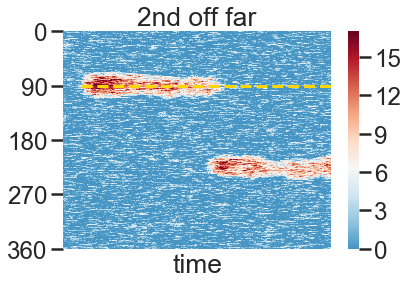

In [75]:
#2nd off far
fee=0.94
fei=0.92
fie=1.14
fii=1.08

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=135, tauE=20, tauI=10,  n_stims=2, I0E=0.1, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 


RE_sorted=flipud(an[4])
sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.gca().set_title('2nd off far')
plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
plt.gca().set_xticks([])
plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
plt.gca().set_yticklabels(['0','90','180', '270', '360'])
plt.gca().set_xlabel('time');

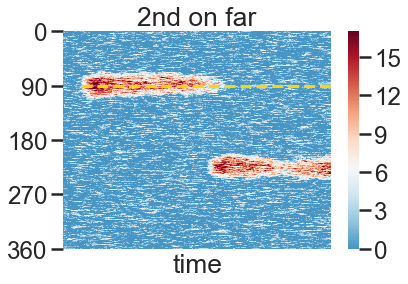

In [78]:
# 2nd on far
fee=0.94
fei=0.92
fie=1.14
fii=1.08

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=135, tauE=20, tauI=10,  n_stims=2, I0E=0.18, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 


RE_sorted=flipud(an[4])
sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.gca().set_title('2nd on far')
plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
plt.gca().set_xticks([])
plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
plt.gca().set_yticklabels(['0','90','180', '270', '360'])
plt.gca().set_xlabel('time');

## Plots

In [26]:
#1st
df_f =pd.read_excel('remembers_first_I0E.xlsx')
df_f.columns=['error', 'stimulation', 'distance']
df_f['abs_err']=abs(df_f['error'])
df_f['performance']=df_f['abs_err']<20
#dff_=dff_[dff_['abs_err']< dff_['abs_err'].mean() + 2*dff_['abs_err'].std()]
df_f['order']='1st'

In [27]:
#2nd
df_s =pd.read_excel('remembers_second_I0E.xlsx')
df_s.columns=['error', 'stimulation', 'distance']
df_s['abs_err']=abs(df_s['error'])
df_s['performance']=df_s['abs_err']<20
#dff_=dff_[dff_['abs_err']< dff_['abs_err'].mean() + 2*dff_['abs_err'].std()]
df_s['order']='2nd'

In [28]:
df_tot=pd.concat([df_f, df_s])
df_tot=df_tot[df_tot['abs_err']< df_tot['abs_err'].mean() + 2*df_tot['abs_err'].std()] # remove here the outliers, not cond by cond

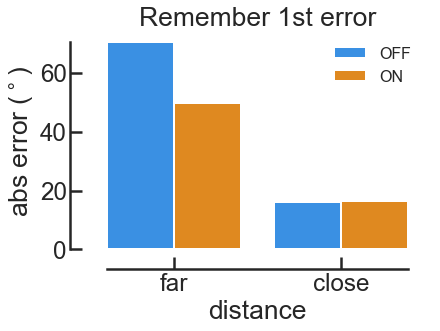

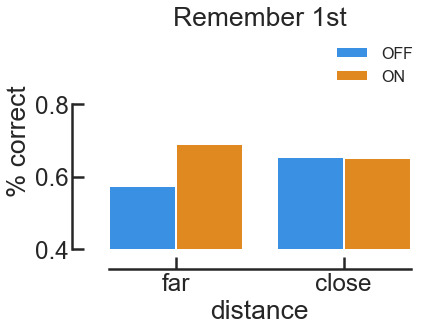

In [31]:
sns.barplot(x='distance', y='abs_err', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=None, data=df_tot.loc[df_tot['order']=='1st'])
plt.ylabel(r'abs error ($^\circ$)')
plt.title('Remember 1st error')
#plt.ylim(12,20)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16});
plt.show()


sns.barplot(x='distance', y='performance', hue='stimulation', order=['far', 'close'], 
            palette = offon_pal, hue_order=['OFF', 'ON'], ci=None, data=df_tot.loc[df_tot['order']=='1st'])
plt.ylabel(r'% correct')
plt.title('Remember 1st')
plt.ylim(0.4,1)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16});

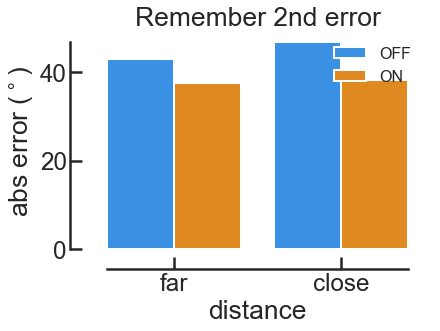

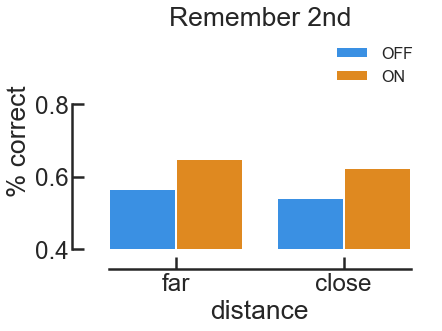

In [30]:
sns.barplot(x='distance', y='abs_err', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=None, data=df_tot.loc[df_tot['order']=='2nd'])
plt.ylabel(r'abs error ($^\circ$)')
plt.title('Remember 2nd error')
#plt.ylim(12,20)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16})
plt.show(block=False)


sns.barplot(x='distance', y='performance', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=None, data=df_tot.loc[df_tot['order']=='2nd'])
plt.ylabel(r'% correct')
plt.title('Remember 2nd')
plt.ylim(0.4,1)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16})
plt.show(block=False)